# Chapter 4: Classification
- **Chapter 4 from the book [An Introduction to Statistical Learning](https://www.statlearning.com/)**
- **By Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani**
- **Pages from $171$ to $173$**


- **Questions:**
 - **[10.](#10) [a,](#10a) [b,](#10b) [c,](#10c) [d,](#10d) [e,](#10e) [f,](#10f) [g,](#10g) [h](#10h) [i](#10i)**
 - **[11.](#11) [a,](#11a) [b,](#11b) [c,](#11c) [d,](#11d) [e,](#11e) [f](#11f) [g](#11g)**
 - **[12.](#12) [a,](#12a) [b,](#12b) [c](#12c) [d,](#12d) [e,](#12e) [f](#12f)**
 - **[13.](#13)**


# <span style="font-family:cursive;color:#0071bb;"> 4.7 Exercises </span>
## <span style="font-family:cursive;color:#0071bb;"> Applied </span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

# Improt LDA, QDA KNN, and LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

<a id='10'></a>
### 10. This question should be answered using the $\color{red}{\text{Weekly}}$ data set, which is part of the $\color{red}{\text{ISLR}}$ package. This data is similar in nature to the $\color{red}{\text{Smarket}}$ data from this chapter's lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

<a id='10a'></a>
**$(a)$ Produce some numerical and graphical summaries of the $\color{red}{\text{Weekly}}$ data. Do there appear to be any patterns?**

In [2]:
# Read the Weekly dataset
weekly_df = pd.read_csv('datasets/Weekly.csv')
weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [4]:
# Get all dummies in the df
weekly_df = pd.get_dummies(weekly_df, drop_first=True)

# produce a numerical summary
weekly_df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


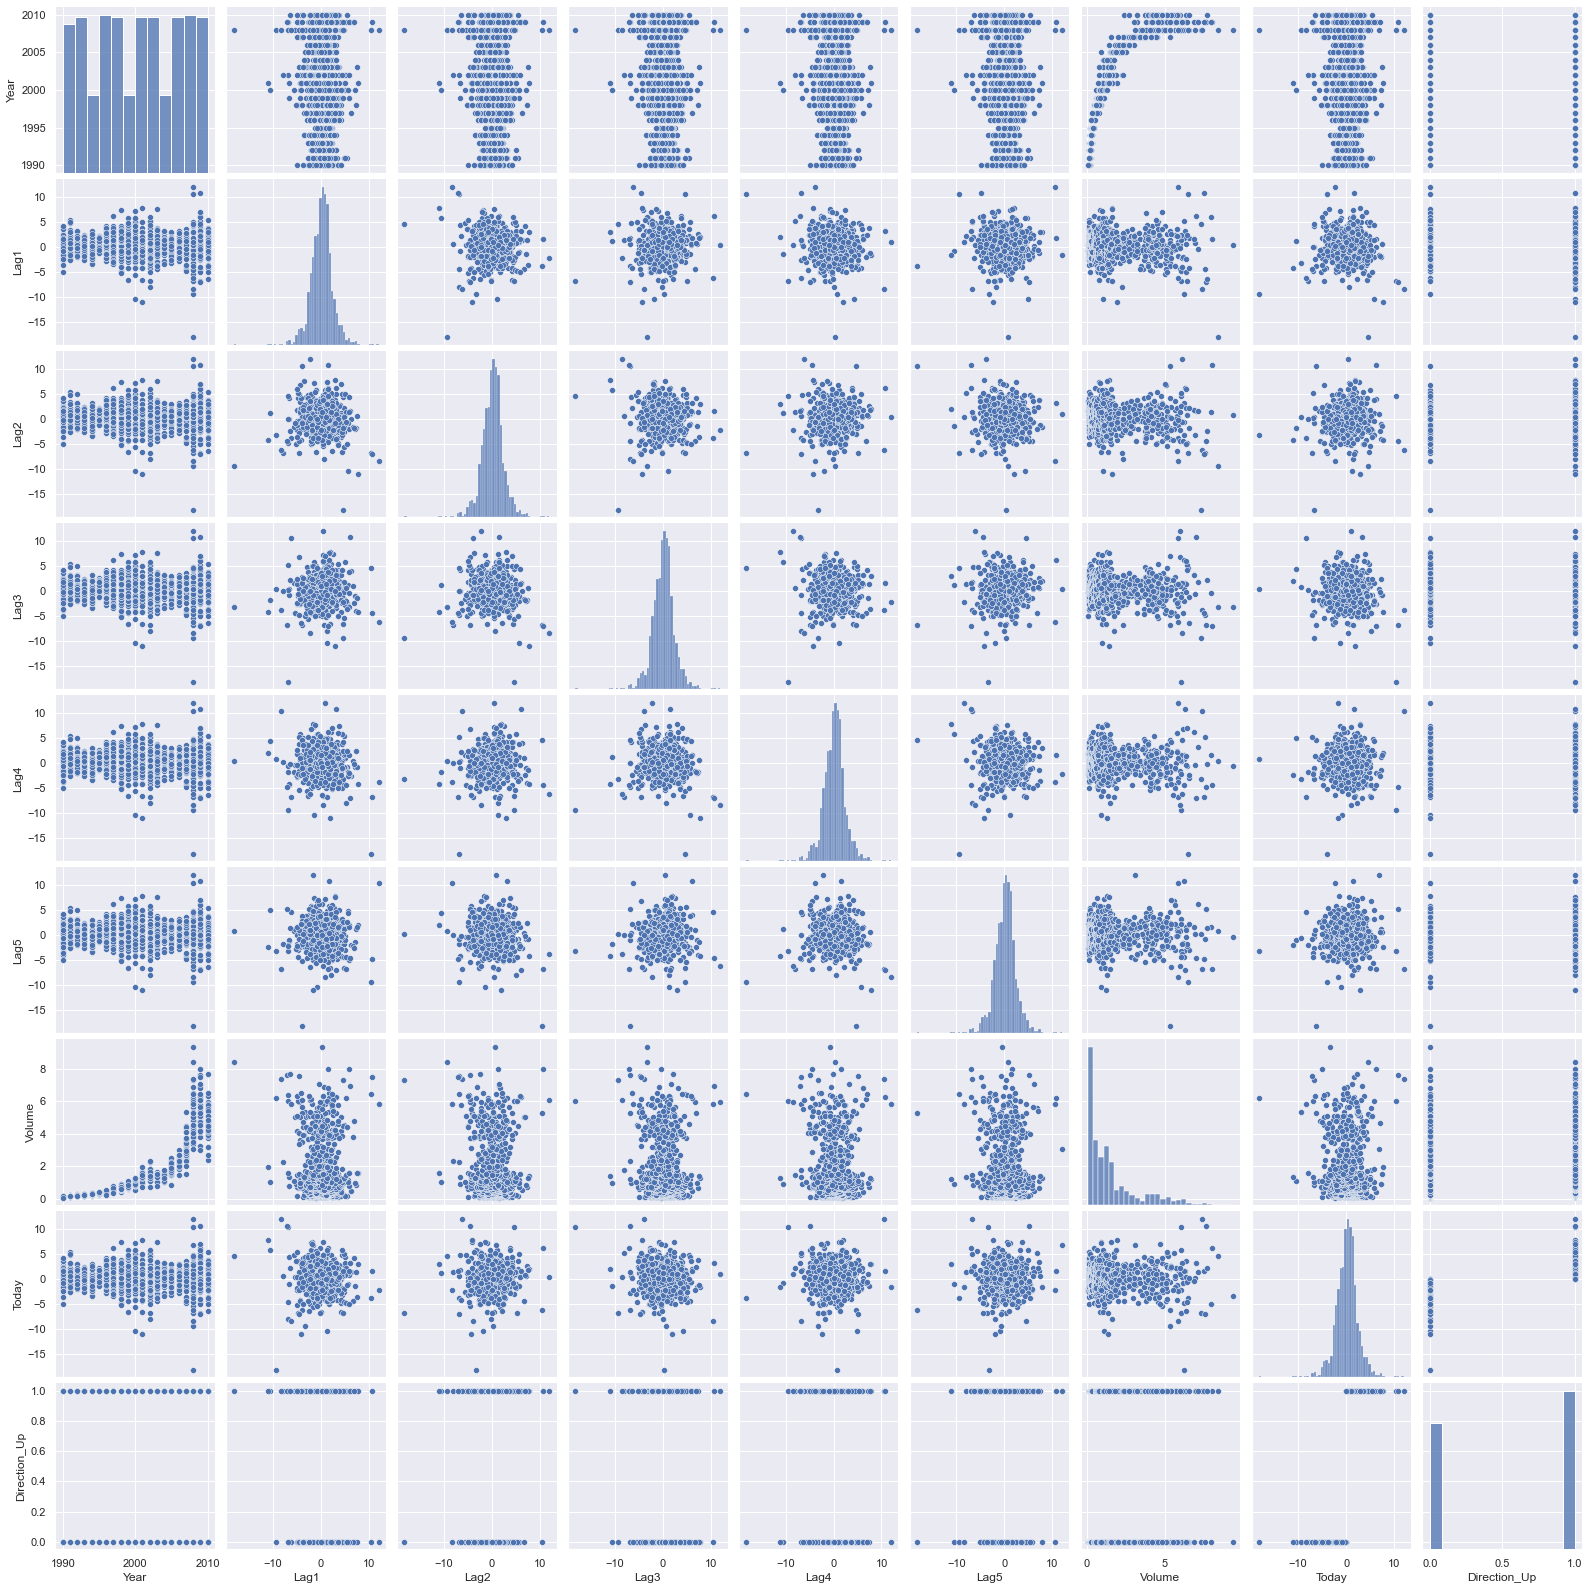

In [5]:
# produce a scatterplot matrix
sns.pairplot(weekly_df);

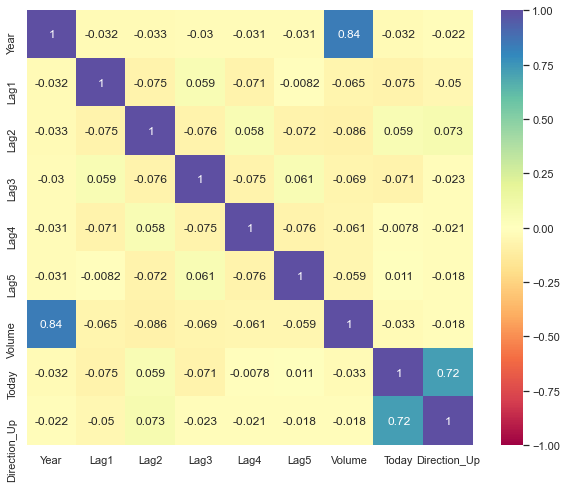

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(weekly_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral');

>- **We can see from the scatterplot matrix and the corr-heatmap that:**
>  - The variable $\text{Volume}$ tends to increase exponentially over time, and it looks more to be a quadratic form.
>  - The variable $Time$ which is the percentage return for this week, correlated with the $Direction$ variable.

<a id='10b'></a>
**$(b)$ Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?**

In [7]:
# Model
f_10b = 'Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
lr_10b = smf.logit(formula=f_10b, data=weekly_df).fit()
lr_10b.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 03 Jul 2021   Pseudo R-squ.:                0.006580
Time:                        15:53:40   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [8]:
lr_10b.pvalues[lr_10b.pvalues < 0.05].sort_values()

Intercept    0.001899
Lag2         0.029601
dtype: float64

>- **Just the predictor $lag2$ appears to be statistically significant, with a $\text{p-value}$ smaller than our threshold of $0.05$.**

<a id='10c'></a>
**$(c)$ Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.**

In [9]:
# for more info about confusion matrix
# https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.pred_table.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://classeval.wordpress.com/introduction/basic-evaluation-measures/

# the rows refer to the true values,
# the columns refer to the pred values

y_true = [0, 1, 1, 1, 1, 1]
y_pred = [1, 0, 0, 1, 1, 1]

confusion_matrix(y_true, y_pred)

array([[0, 1],
       [2, 3]], dtype=int64)

In [10]:
def plot_confusion_matrix(confusion_matrix):
    """plot a confusion matrix with labels"""
    
    ax = sns.heatmap(pd.DataFrame(confusion_matrix),
                     annot=True, cmap="Blues", cbar=False, fmt='g')
    plt.xlabel("Predicted label", fontsize = 15)
    plt.ylabel("True label",    fontsize = 15)
    plt.show()

# Classifier stats
# -------------------------------------------------
def accuracy(confusion_matrix):
    """Overall, how often is the classifier correct?
        ex:
        x = confusion_matrix(y_true, y_pred)
        ... array([[0, 1],
                   [2, 3]], dtype=int64)
        accuracy(x)= (0+3)/(0+1+2+3)"""
    return np.trace(confusion_matrix) / np.sum(confusion_matrix)

def total_error_rate(confusion_matrix):
    """total error rate from confusion matrix
        ex:
        x = confusion_matrix(y_true, y_pred)
        ... array([[0, 1],
                   [2, 3]], dtype=int64)
        total_error_rate(x)= 1 - (0+3)/(0+1+2+3)"""
    return 1 - accuracy(confusion_matrix)


def true_negative_rate(confusion_matrix):
    """also known as "Specificity"
       When it's actually no, how often does it predict no?
        ex:
        x = confusion_matrix(y_true, y_pred)
        ... array([[0, 1],
                   [2, 3]], dtype=int64)
        true_negative_rate(x)= (0)/(0+1)"""
    return confusion_matrix[0, 0] / np.sum(confusion_matrix[0, :])

def true_positive_rate(confusion_matrix):
    """also known as "Sensitivity" or "Recall"
       When it's actually yes, how often does it predict yes?
        ex:
        x = confusion_matrix(y_true, y_pred)
        ... array([[0, 1],
                   [2, 3]], dtype=int64)
        true_positive_rate(x)= (3)/(2+3)"""
    return confusion_matrix[1, 1] / np.sum(confusion_matrix[1, :])

def false_negative_rate(confusion_matrix):
    """When it's actually yes, how often does it predict no?
        ex:
        x = confusion_matrix(y_true, y_pred)
        ... array([[0, 1],
                   [2, 3]], dtype=int64)
        false_negative_rate(x)= (2)/(2+3)"""
    return 1 - true_positive_rate(confusion_matrix)

def false_positive_rate(confusion_matrix):
    """When it's actually no, how often does it predict yes?
        ex:
        x = confusion_matrix(y_true, y_pred)
        ... array([[0, 1],
                   [2, 3]], dtype=int64)
        false_positive_rate(x)= (1)/(0+1)"""
    return 1 - true_negative_rate(confusion_matrix)

def positive_predictive_value(confusion_matrix):
    """also known as "Precision": When it predicts yes, how often is it correct?
        ex:
        x = confusion_matrix(y_true, y_pred)
        ... array([[0, 1],
                   [2, 3]], dtype=int64)
        positive_predictive_value(x)= (3)/(1+3)"""
    return confusion_matrix[1, 1] / np.sum(confusion_matrix[:, 1])

def negative_predictive_value(confusion_matrix):
    """the proportion of predicted negatives that are correctly predicted
        ex:
        x = confusion_matrix(y_true, y_pred)
        ... array([[0, 1],
                   [2, 3]], dtype=int64)
        negative_predictive_value(x)= (0)/(0+2)"""
    return confusion_matrix[0, 0] / np.sum(confusion_matrix[:, 0])

def prior_error_rate(confusion_matrix):
    """The prior probability that a result is positive
        ex:
        x = confusion_matrix(y_true, y_pred)
        ... array([[0, 1],
                   [2, 3]], dtype=int64)
        prior_error_rate(x)= 1 - (2+3)/(0+1+2+3)"""
    return 1 - (np.sum(confusion_matrix[1, :]) / np.sum(confusion_matrix))

def conf_mtx_stats(confusion_matrix):
    return round(pd.Series({'Accuracy': accuracy(confusion_matrix),
                      'Total_Error_Rate': total_error_rate(confusion_matrix),
                      'True_Negative_Rate (Specificity)': true_negative_rate(confusion_matrix),
                      'True_Positive_Rate (Recall)': true_positive_rate(confusion_matrix),
                      'False_Negative_Rate': false_negative_rate(confusion_matrix),
                      'False_Positive_Rate': false_positive_rate(confusion_matrix),
                      'negative_Predictive_Value': negative_predictive_value(confusion_matrix),
                      'Positive_Predictive_Value (Precision)': positive_predictive_value(confusion_matrix),
                      'Prior_Error_Rate': prior_error_rate(confusion_matrix),
                      }),4)

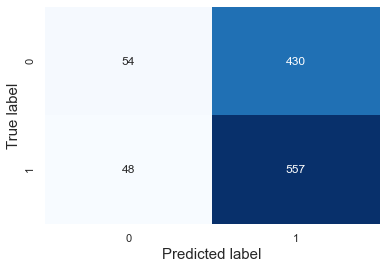

Accuracy                                 0.5611
Total_Error_Rate                         0.4389
True_Negative_Rate (Specificity)         0.1116
True_Positive_Rate (Recall)              0.9207
False_Negative_Rate                      0.0793
False_Positive_Rate                      0.8884
negative_Predictive_Value                0.5294
Positive_Predictive_Value (Precision)    0.5643
Prior_Error_Rate                         0.4444
dtype: float64

overall fraction of correct predictions: 0.5556


In [11]:
# confusion matrix
plot_confusion_matrix(lr_10b.pred_table())

# overall stats
display(conf_mtx_stats(lr_10b.pred_table()))

# overall fraction of correct predictions
print("overall fraction of correct predictions:",
      round(weekly_df.Direction_Up.sum()/len(weekly_df), 4))

>- **Answer:**
>  - Overall our model accuracy is $56.11\%$, which is slightly better than the data overall fraction of correct predictions $55.56\%$.
>  - The True Negative Rate "Specificity" with $11.16\%$ indicates that the model performs very poorly in predicting "$0$" which is Direction_Down.
>  - The True Positive Rate "Recall" with $92.07\%$ indicates that the model outperforms in predicting "1" which is Direction_Up.
>  - But the "Precision" with $56.43\%$ shows that the model tends to predict "1" whether it is "0" or "1".

<a id='10d'></a>
**$(d)$ Now fit the logistic regression model using a training data period from 1990 to 2008, with $\text{Lag2}$ as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).**

In [12]:
# Create train and test sets
x_train = np.array(weekly_df[weekly_df['Year'] <2009]['Lag2']).reshape(-1,1)
y_train = weekly_df[weekly_df['Year'] <2009]['Direction_Up']
x_test  = np.array(weekly_df[weekly_df['Year'] >=2009]['Lag2']).reshape(-1,1)
y_test  = weekly_df[weekly_df['Year'] >=2009]['Direction_Up']


# overall fraction of correct predictions
print("overall fraction of correct predictions:",
      round(y_test.sum()/len(y_test), 4))

overall fraction of correct predictions: 0.5865


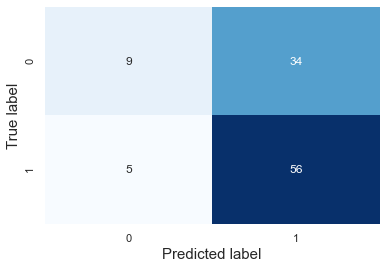

Accuracy                                 0.6250
Total_Error_Rate                         0.3750
True_Negative_Rate (Specificity)         0.2093
True_Positive_Rate (Recall)              0.9180
False_Negative_Rate                      0.0820
False_Positive_Rate                      0.7907
negative_Predictive_Value                0.6429
Positive_Predictive_Value (Precision)    0.6222
Prior_Error_Rate                         0.4135
dtype: float64

overall fraction of correct predictions for the held out data: 0.5865


In [13]:
# Model 
log = LogR().fit(x_train, y_train)

# predict y_test
y_pred = log.predict(x_test)

# confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# overall stats
log_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
display(log_stats)

# overall fraction of correct predictions
print("overall fraction of correct predictions for the held out data:",
      round(y_test.sum()/len(y_test), 4))

<a id='10e'></a>
**$(e)$ Repeat $(d)$ using $LDA$.**

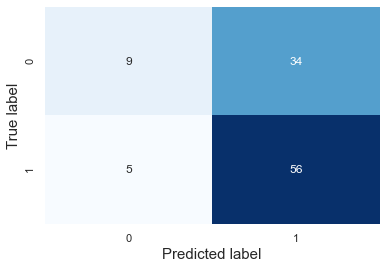

Accuracy                                 0.6250
Total_Error_Rate                         0.3750
True_Negative_Rate (Specificity)         0.2093
True_Positive_Rate (Recall)              0.9180
False_Negative_Rate                      0.0820
False_Positive_Rate                      0.7907
negative_Predictive_Value                0.6429
Positive_Predictive_Value (Precision)    0.6222
Prior_Error_Rate                         0.4135
dtype: float64

overall fraction of correct predictions for the held out data: 0.5865


In [14]:
# Model 
lda = LDA().fit(x_train, y_train)

# predict y_test
y_pred = lda.predict(x_test)

# confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# overall stats
lda_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
display(lda_stats)

# overall fraction of correct predictions
print("overall fraction of correct predictions for the held out data:",
      round(y_test.sum()/len(y_test), 4))

<a id='10f'></a>
**$(f)$ Repeat $(d)$ using $QDA$.**

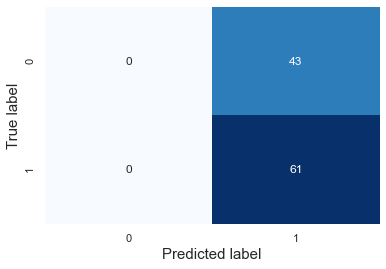

Accuracy                                 0.5865
Total_Error_Rate                         0.4135
True_Negative_Rate (Specificity)         0.0000
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      1.0000
negative_Predictive_Value                   NaN
Positive_Predictive_Value (Precision)    0.5865
Prior_Error_Rate                         0.4135
dtype: float64

overall fraction of correct predictions for the held out data: 0.5865


In [15]:
# Model 
qda = QDA().fit(x_train, y_train)

# predict y_test
y_pred = qda.predict(x_test)

# confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# overall stats
qda_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
display(qda_stats)
    
# overall fraction of correct predictions
print("overall fraction of correct predictions for the held out data:",
      round(y_test.sum()/len(y_test), 4))

<a id='10g'></a>
**$(g)$ Repeat $(d)$ using $\text{KNN}$ with $K = 1$.**
>- Usually, as a pre-processing step for $\text{KNN}$ (with multiple predictors over different scales), we would want to standardize the predictors $(x_{new} = \frac{x-\mu}{\sigma})$ so that each $x_{new}$ will have a mean of $0$ and standard deviation of $1$.

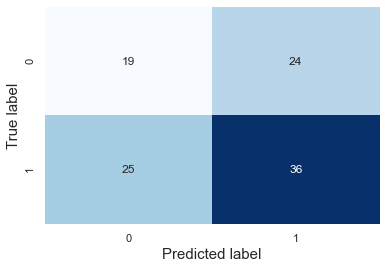

Accuracy                                 0.5288
Total_Error_Rate                         0.4712
True_Negative_Rate (Specificity)         0.4419
True_Positive_Rate (Recall)              0.5902
False_Negative_Rate                      0.4098
False_Positive_Rate                      0.5581
negative_Predictive_Value                0.4318
Positive_Predictive_Value (Precision)    0.6000
Prior_Error_Rate                         0.4135
dtype: float64

overall fraction of correct predictions for the held out data: 0.5865


In [16]:
# Model 
knn = KNN(1).fit(preprocessing.scale(x_train), y_train)

# predict y_test
y_pred = knn.predict(preprocessing.scale(x_test))

# confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# overall stats
knn_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
display(knn_stats)

# overall fraction of correct predictions
print("overall fraction of correct predictions for the held out data:",
      round(y_test.sum()/len(y_test), 4))

<a id='10h'></a>
**$(h)$ Which of these methods appears to provide the best results on this data?**

In [17]:
stats = pd.DataFrame({'log': log_stats,
                      'lda': lda_stats,
                      'qda': qda_stats,
                      'knn': knn_stats}).T
display(stats.T)

,log,lda,qda,knn
Accuracy,0.6250,0.6250,0.5865,0.5288
Total_Error_Rate,0.3750,0.3750,0.4135,0.4712
True_Negative_Rate (Specificity),0.2093,0.2093,0.0000,0.4419
True_Positive_Rate (Recall),0.9180,0.9180,1.0000,0.5902
False_Negative_Rate,0.0820,0.0820,0.0000,0.4098
False_Positive_Rate,0.7907,0.7907,1.0000,0.5581
negative_Predictive_Value,0.6429,0.6429,NaN,0.4318
Positive_Predictive_Value (Precision),0.6222,0.6222,0.5865,0.6000
Prior_Error_Rate,0.4135,0.4135,0.4135,0.4135


>- **Answer:**
>  - **Logistic regression** and **$LDA$** seem to have the best accuracy with $62.50\%$ over other models, and it's slightly better than the naive approach `"The overall fraction of correct predictions"` with $58.65\%$.
>  - Overall **Logistic regression** and **$LDA$** both provide the same results and the best results.

<a id='10i'></a>
**$(i)$ Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the $\text{KNN}$ classifier.**

In [18]:
# spliting the data for train and test sets
weekly_df_train = weekly_df[weekly_df['Year'] < 2009]
weekly_df_test  = weekly_df[weekly_df['Year'] >=2009]


# Create train and test sets functions 
# including possible transformations and interactions

# f0 function with only predictors
f0 = 'Direction_Up ~ Year + Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume + Today'

# f1 function with all possible interaction
f1 = f0
ia = ['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']
l = list()
# all possible interaction
for i in ia:
    for j in ia:
        if (i != j) and (j not in l):
            f1 += (f" + {i}*{j}")
    l.append(i)

# f2 function with log transformation
f2 = 'Direction_Up ~ np.log1p(Year) + np.log1p(Lag1) + np.log1p(Lag2) + np.log1p(Lag3) + np.log1p(Lag4) + np.log1p(Lag5) + np.log1p(Volume) + np.log1p(Today)'

# and finally f3 function with square transformation
f3 = 'Direction_Up ~ np.square(Year) + np.square(Lag1) + np.square(Lag2) + np.square(Lag3) + np.square(Lag4) + np.square(Lag5) + np.square(Volume) + np.square(Today)'

# saving all the functions in f_d
f_d = {'only_predictors': f0,
       'interactions':    f1,
       'log':             f2,
       'square':          f3}

m1, m2 = ['lda', 'qda'], ['log', 'knn1', 'knn3', 'knn5']
models_dict = dict()

# training all possible models with the specific data sets
for f in f_d:
    # for more details how patsy.dmatrices() working check:
    # https://patsy.readthedocs.io/en/latest/API-reference.html#patsy.dmatrices
    y_train, x_train = patsy.dmatrices(f_d[f], weekly_df_train, return_type='dataframe')
    y_test, x_test   = patsy.dmatrices(f_d[f], weekly_df_test,  return_type='dataframe')
    
    for i, model in enumerate([LDA(), QDA()]):
        # Model
        model  = model.fit(x_train, np.array(y_train.Direction_Up))
        y_pred = model.predict(x_test) 
        c_m    = confusion_matrix(y_test, y_pred)
        models_dict[m1[i]+'_'+f] = [c_m, conf_mtx_stats(c_m)]
        
        
    for i, model in enumerate([LogR(), KNN(1), KNN(3), KNN(5)]):
        # Model
        model  = model.fit(preprocessing.scale(x_train), np.array(y_train.Direction_Up))
        y_pred = model.predict(x_test) 
        c_m    = confusion_matrix(y_test, y_pred)
        models_dict[m2[i]+'_'+f] = [c_m, conf_mtx_stats(c_m)]

In [19]:
acc = []
for i in models_dict:
    acc.append([i, models_dict[i][1][0]])
acc = pd.DataFrame(acc, columns=['model', 'acc']).sort_values('acc', ascending=False)
acc

,model,acc
8,log_interactions,1.0000
12,lda_log,0.9600
14,log_log,0.9600
0,lda_only_predictors,0.9327
6,lda_interactions,0.9038
7,qda_interactions,0.9038
16,knn3_log,0.8800
17,knn5_log,0.8800
15,knn1_log,0.8400
5,knn5_only_predictors,0.8269


log_interactions:


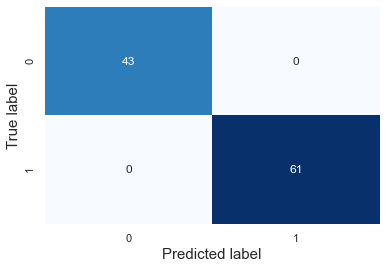

Accuracy                                 1.0000
Total_Error_Rate                         0.0000
True_Negative_Rate (Specificity)         1.0000
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.0000
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    1.0000
Prior_Error_Rate                         0.4135
dtype: float64

lda_log:


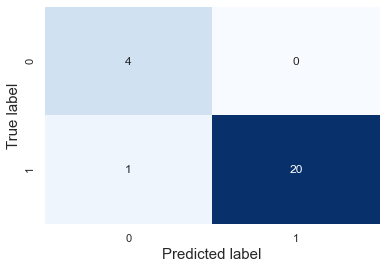

Accuracy                                 0.9600
Total_Error_Rate                         0.0400
True_Negative_Rate (Specificity)         1.0000
True_Positive_Rate (Recall)              0.9524
False_Negative_Rate                      0.0476
False_Positive_Rate                      0.0000
negative_Predictive_Value                0.8000
Positive_Predictive_Value (Precision)    1.0000
Prior_Error_Rate                         0.1600
dtype: float64

log_log:


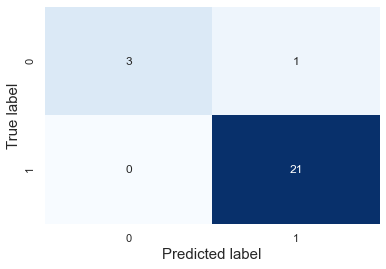

Accuracy                                 0.9600
Total_Error_Rate                         0.0400
True_Negative_Rate (Specificity)         0.7500
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2500
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.9545
Prior_Error_Rate                         0.1600
dtype: float64

In [20]:
# sort to get the best 3 performing models 
best_3 = acc.head(3)

for i in best_3.model:
    print(i+':')
    plot_confusion_matrix(models_dict[i][0])
    display(models_dict[i][1])

>- logistic regression with all possible interactions surprisingly seems to have a perfect accuracy on the test set!
>- And from question $(h)$, still Logistic regression and $LDA$ tend to have a higher score with all different combinations.

<a id='11'></a>
### 11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

<a id='11a'></a>
**$(a)$ Create a binary variable, $mpg01$, that contains a $1$ if $mpg$ contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the $median()$ function. Note you may find it helpful to use the $\text{data.frame()}$ function to create a single data set containing both $mpg01$ and the other Auto variables.**

In [21]:
auto_df = pd.read_csv('datasets/auto.csv')

# Remove missing values "?"
auto_df = auto_df.drop(auto_df[auto_df.values == '?'].index)
auto_df = auto_df.reset_index(drop=True)

auto_df["horsepower"] = auto_df.horsepower.astype(np.int64)

# Create a binary variable, mpg01
auto_df['mpg01'] = (auto_df['mpg'] > auto_df['mpg'].median()).astype(np.int)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


<a id='11b'></a>
**$(b)$ Explore the data graphically in order to investigate the association between $mpg01$ and the other features. Which of the other features seem most likely to be useful in predicting $mpg01$? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.**

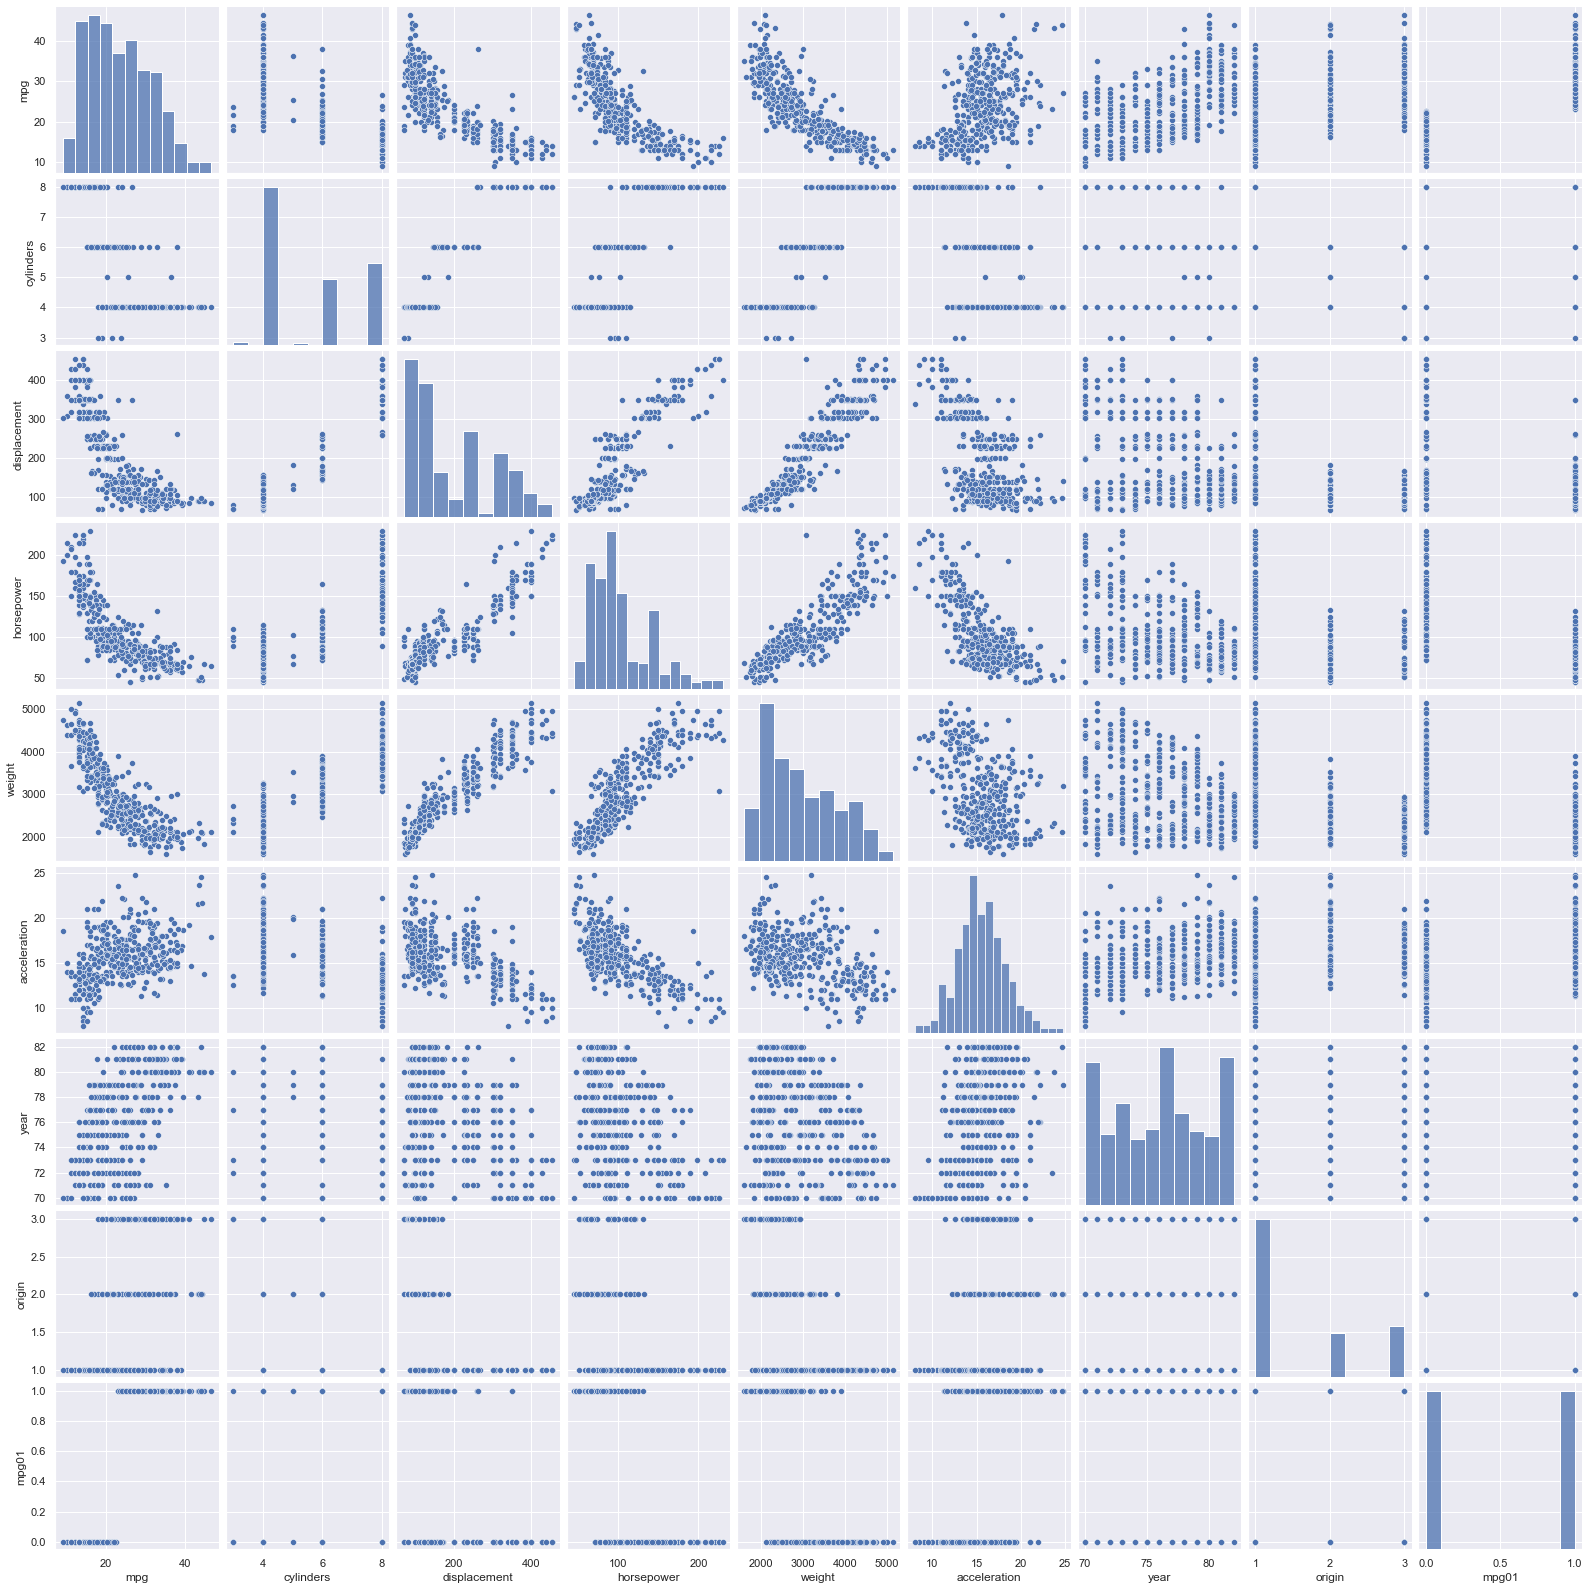

In [22]:
sns.pairplot(auto_df);

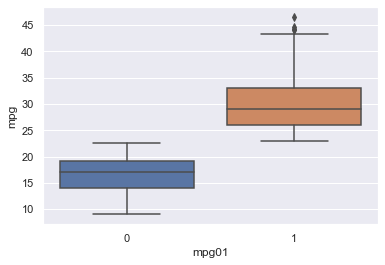

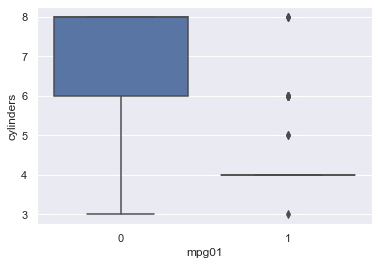

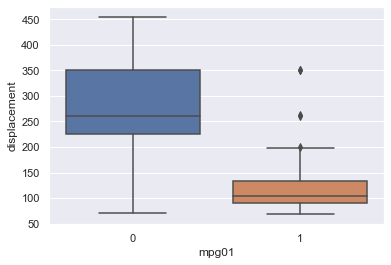

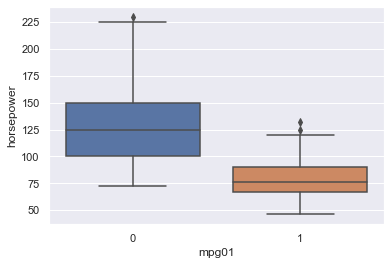

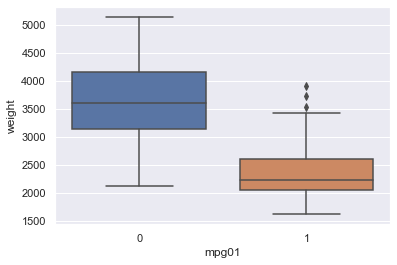

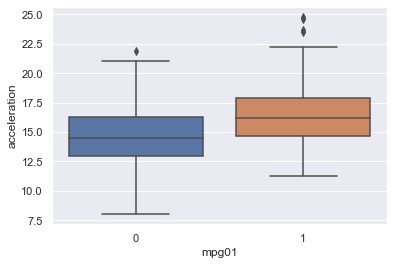

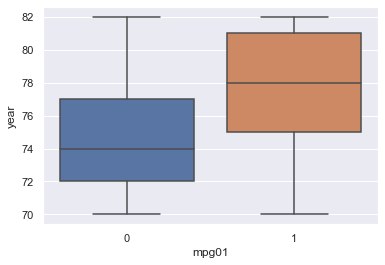

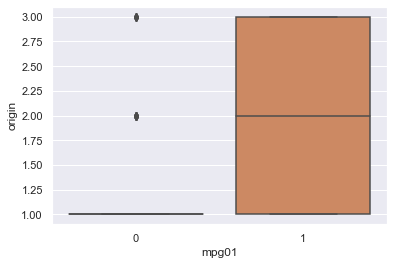

In [23]:
for col in auto_df.columns.drop(['mpg01', 'name']):
    sns.boxplot(x=auto_df['mpg01'], y=auto_df[col])
    plt.show();

>- **cylinders**, **displacement**, **horsepower**, **Weight**, and **year** seem most likely to be useful in predicting $mpg01$.

<a id='11c'></a>
**$(c)$ Split the data into a training set and a test set.**

In [24]:
predictors  = ['cylinders', 'displacement', 'horsepower', 'weight', 'year']
X_train, X_test, y_train, y_test = train_test_split(auto_df[predictors], 
                                                    auto_df['mpg01'],
                                                    test_size=0.3,
                                                    random_state=42)

<a id='11d'></a>
**$(d)$ Perform $LDA$ on the training data in order to predict $mpg01$ using the variables that seemed most associated with $mpg01$ in $(b)$. What is the test error of the model obtained?**

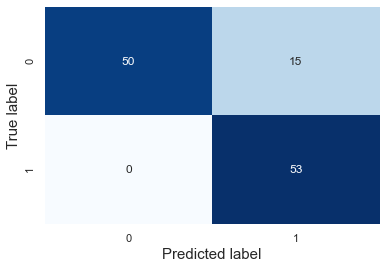

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

In [25]:
models_accuracy = dict()

# Model 
lda = LDA().fit(X_train, y_train)

# predict y_test
y_pred = lda.predict(X_test)

# confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# overall stats
lda_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
display(lda_stats)

models_accuracy['LDA'] = lda_stats[0]

<a id='11e'></a>
**$(e)$ Perform $QDA$ on the training data in order to predict $mpg01$ using the variables that seemed most associated with $mpg01$ in $(b)$. What is the test error of the model obtained?**

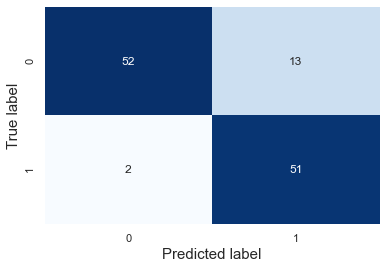

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.8000
True_Positive_Rate (Recall)              0.9623
False_Negative_Rate                      0.0377
False_Positive_Rate                      0.2000
negative_Predictive_Value                0.9630
Positive_Predictive_Value (Precision)    0.7969
Prior_Error_Rate                         0.5508
dtype: float64

In [26]:
# Model 
qda = QDA().fit(X_train, y_train)

# predict y_test
y_pred = qda.predict(X_test)

# confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# overall stats
qda_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
display(qda_stats)

models_accuracy['QDA'] = qda_stats[0]

<a id='11f'></a>
**$(f)$ Perform logistic regression on the training data in order to predict $mpg01$ using the variables that seemed most associated with $mpg01$ in $(b)$. What is the test error of the model obtained?**

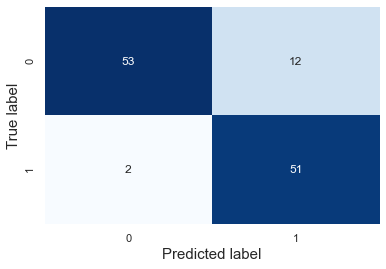

Accuracy                                 0.8814
Total_Error_Rate                         0.1186
True_Negative_Rate (Specificity)         0.8154
True_Positive_Rate (Recall)              0.9623
False_Negative_Rate                      0.0377
False_Positive_Rate                      0.1846
negative_Predictive_Value                0.9636
Positive_Predictive_Value (Precision)    0.8095
Prior_Error_Rate                         0.5508
dtype: float64

In [27]:
# Model 
log = LogR().fit(X_train, y_train)

# predict y_test
y_pred = log.predict(X_test)

# confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# overall stats
log_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
display(log_stats)

models_accuracy['Log'] = log_stats[0]

<a id='11g'></a>
**$(g)$ Perform $\text{KNN}$ on the training data, with several values of $K$, in order to predict $mpg01$. Use only the variables that seemed most associated with $mpg01$ in $(b)$. What test errors do you obtain? Which value of $K$ seems to perform the best on this data set?**

KNN with K = 1


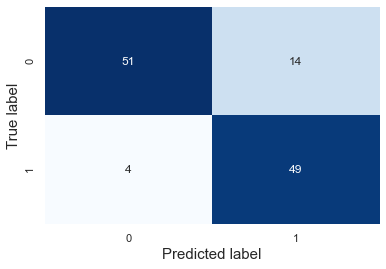

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 2


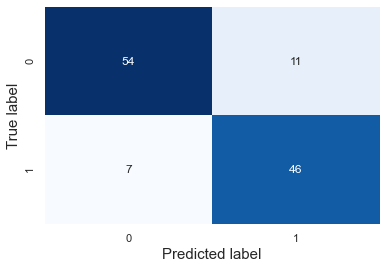

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 3


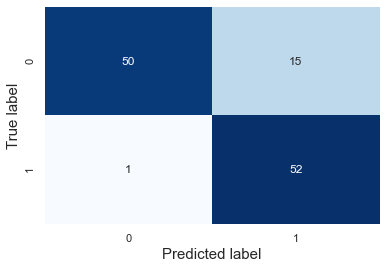

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 5


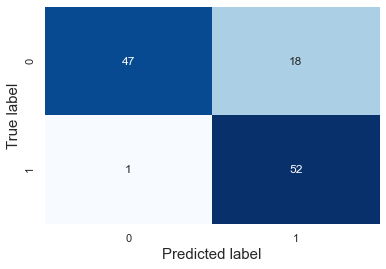

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 10


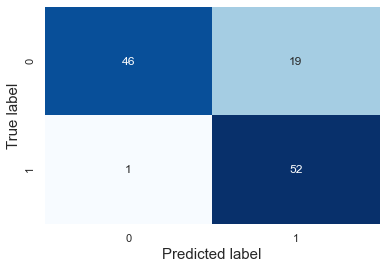

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 20


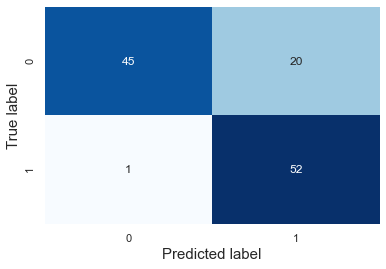

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 



In [28]:
for i in [1, 2, 3, 5, 10, 20]:
    print("KNN with K =", i)
    # Model 
    knn = KNN(i).fit(X_train, y_train)

    # predict y_test
    y_pred = knn.predict(X_test)
    
    # confusion matrix
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))

    # overall stats
    knn_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
    display(lda_stats)
    
    models_accuracy['KNN'+str(i)] = knn_stats[0]
    print("-----------------------------------------", '\n')

In [29]:
acc_df = pd.DataFrame(models_accuracy.values(),
                      models_accuracy.keys(), columns=['Accuracy'])

acc_df.sort_values('Accuracy', ascending=False)

,Accuracy
Log,0.8814
LDA,0.8729
QDA,0.8729
KNN3,0.8644
KNN1,0.8475
KNN2,0.8475
KNN5,0.8390
KNN10,0.8305
KNN20,0.8220


>- **Comment:**
>  - By trying different $\text{random_state}$ numbers, I can say that Logistic regression seems to get the highest score with $88\%$ in the $\text{random_state}$ of $42$.
>  - For the $KNN$ model, it seems like as $k$ value increases the model's score to some optimal $K$ value which after the score will keep decreasing.
>  - Still, with the small training set, we would consider all the models performing well and can't be sure which model performs better.

<a id='12'></a>
### 12. This problem involves writing functions.

<a id='12a'></a>
**$(a)$ Write a function, $Power()$, that prints out the result of raising 2 to the 3rd power. In other words, your function should compute $2^3$ and print out the results.
*- Hint: Recall that $\text{x^a}$ raises $x$ to the power $a$. Use the $print()$ function to output the result.***

In [30]:
def Power():
    return 2**3

Power()

8

<a id='12b'></a>
**$(b)$ Create a new function, $Power2()$, that allows you to pass any two numbers, $x$ and a, and prints out the value of $\text{x^a}$. You can do this by beginning your function with the line**

`> Power2 = function (x,a){`

**You should be able to call your function by entering, for instance,**

`> Power2 (3,8)`

**on the command line. This should output the value of $38$, namely, $6,561$.**

In [31]:
def Power2(x, a):
    return print(x, "^", a, "=", x**a)

Power2(3, 8)

3 ^ 8 = 6561


<a id='12c'></a>
**$(c)$ Using the $Power2()$ function that you just wrote, compute $10^3$, $8^{17}$, and $131^3$.**

In [32]:
Power2(10, 3)

Power2(8, 17)

Power2(131, 3)

10 ^ 3 = 1000
8 ^ 17 = 2251799813685248
131 ^ 3 = 2248091


<a id='12d'></a>
**$(d)$ Now create a new function, $Power3()$, that actually returns the result $\text{x^a}$ as an $R$ object, rather than simply printing it to the screen.**

In [33]:
def Power3(x, a):
    return x**a

<a id='12e'></a>
**$(e)$ Now using the $Power3()$ function, create a plot of $f(x) = x^2$. The $\text{x-axis}$ should display a range of integers from $1$ to $10$, and the $\text{y-axis}$ should display $x2$. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the x-axis, the y-axis, or both on the log-scale. You can do this by using $log=``x``$, $log=``y``$, or $log=``xy``$ as arguments to the $plot()$ function.**

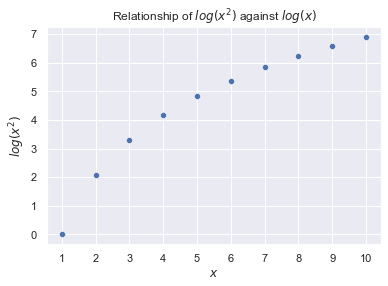

In [34]:
x = np.arange(1, 11)
y = Power3(x, 3)

ax = sns.scatterplot(x=x, y=np.log(y))
plt.xlabel('$x$')
plt.ylabel('$log(x^2)$')
plt.title('Relationship of $log(x^2)$ against $log(x)$')
plt.xticks(x)
plt.show();

<a id='12f'></a>
**$(f)$ Create a function, $PlotPower()$, that allows you to create a plot of $x$ against $\text{x^a}$ for a fixed a and for a range of values of $x$. For instance, if you call**

`> PlotPower (1:10 ,3)`

**then a plot should be created with an x-axis taking on values $1,2,\dots,10$, and a y-axis taking on values $1^3, 2^3,\dots,10^3$.**

In [35]:
def PlotPower(start, stop, power):
    x = np.arange(start, stop+1)
    y = Power3(x, power)
    
    ax = sns.scatterplot(x=x, y=y)
    plt.xlabel('$x$')
    plt.ylabel('$x^{}$'.format(power))
    plt.title('Relationship of $x^{}$ against $x$'.format(power))
    plt.show();

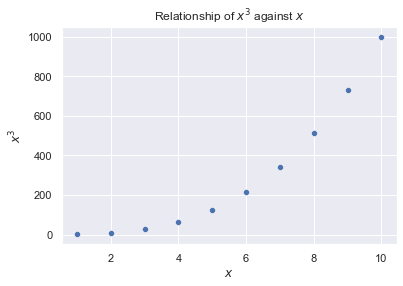

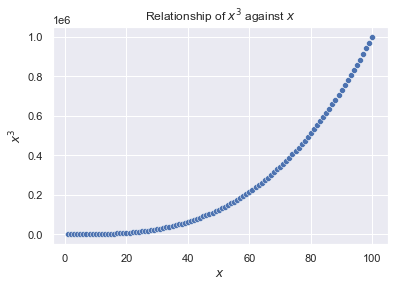

In [36]:
PlotPower(1, 10, 3)
PlotPower(1, 100, 3)

<a id='13'></a>
### 13. Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, $\text{LDA}$, and $\text{KNN}$ models using various subsets of the predictors. Describe your findings.

In [37]:
# read boston data set
boston_df = pd.read_csv('datasets/Boston.csv').drop('Unnamed: 0', axis=1)
print("The median =", boston_df['crim'].median())

# Create a binary variable, crim01
boston_df['crim01'] = (boston_df['crim'] > boston_df['crim'].median()).astype(np.int)
boston_df.head()

The median = 0.25651


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


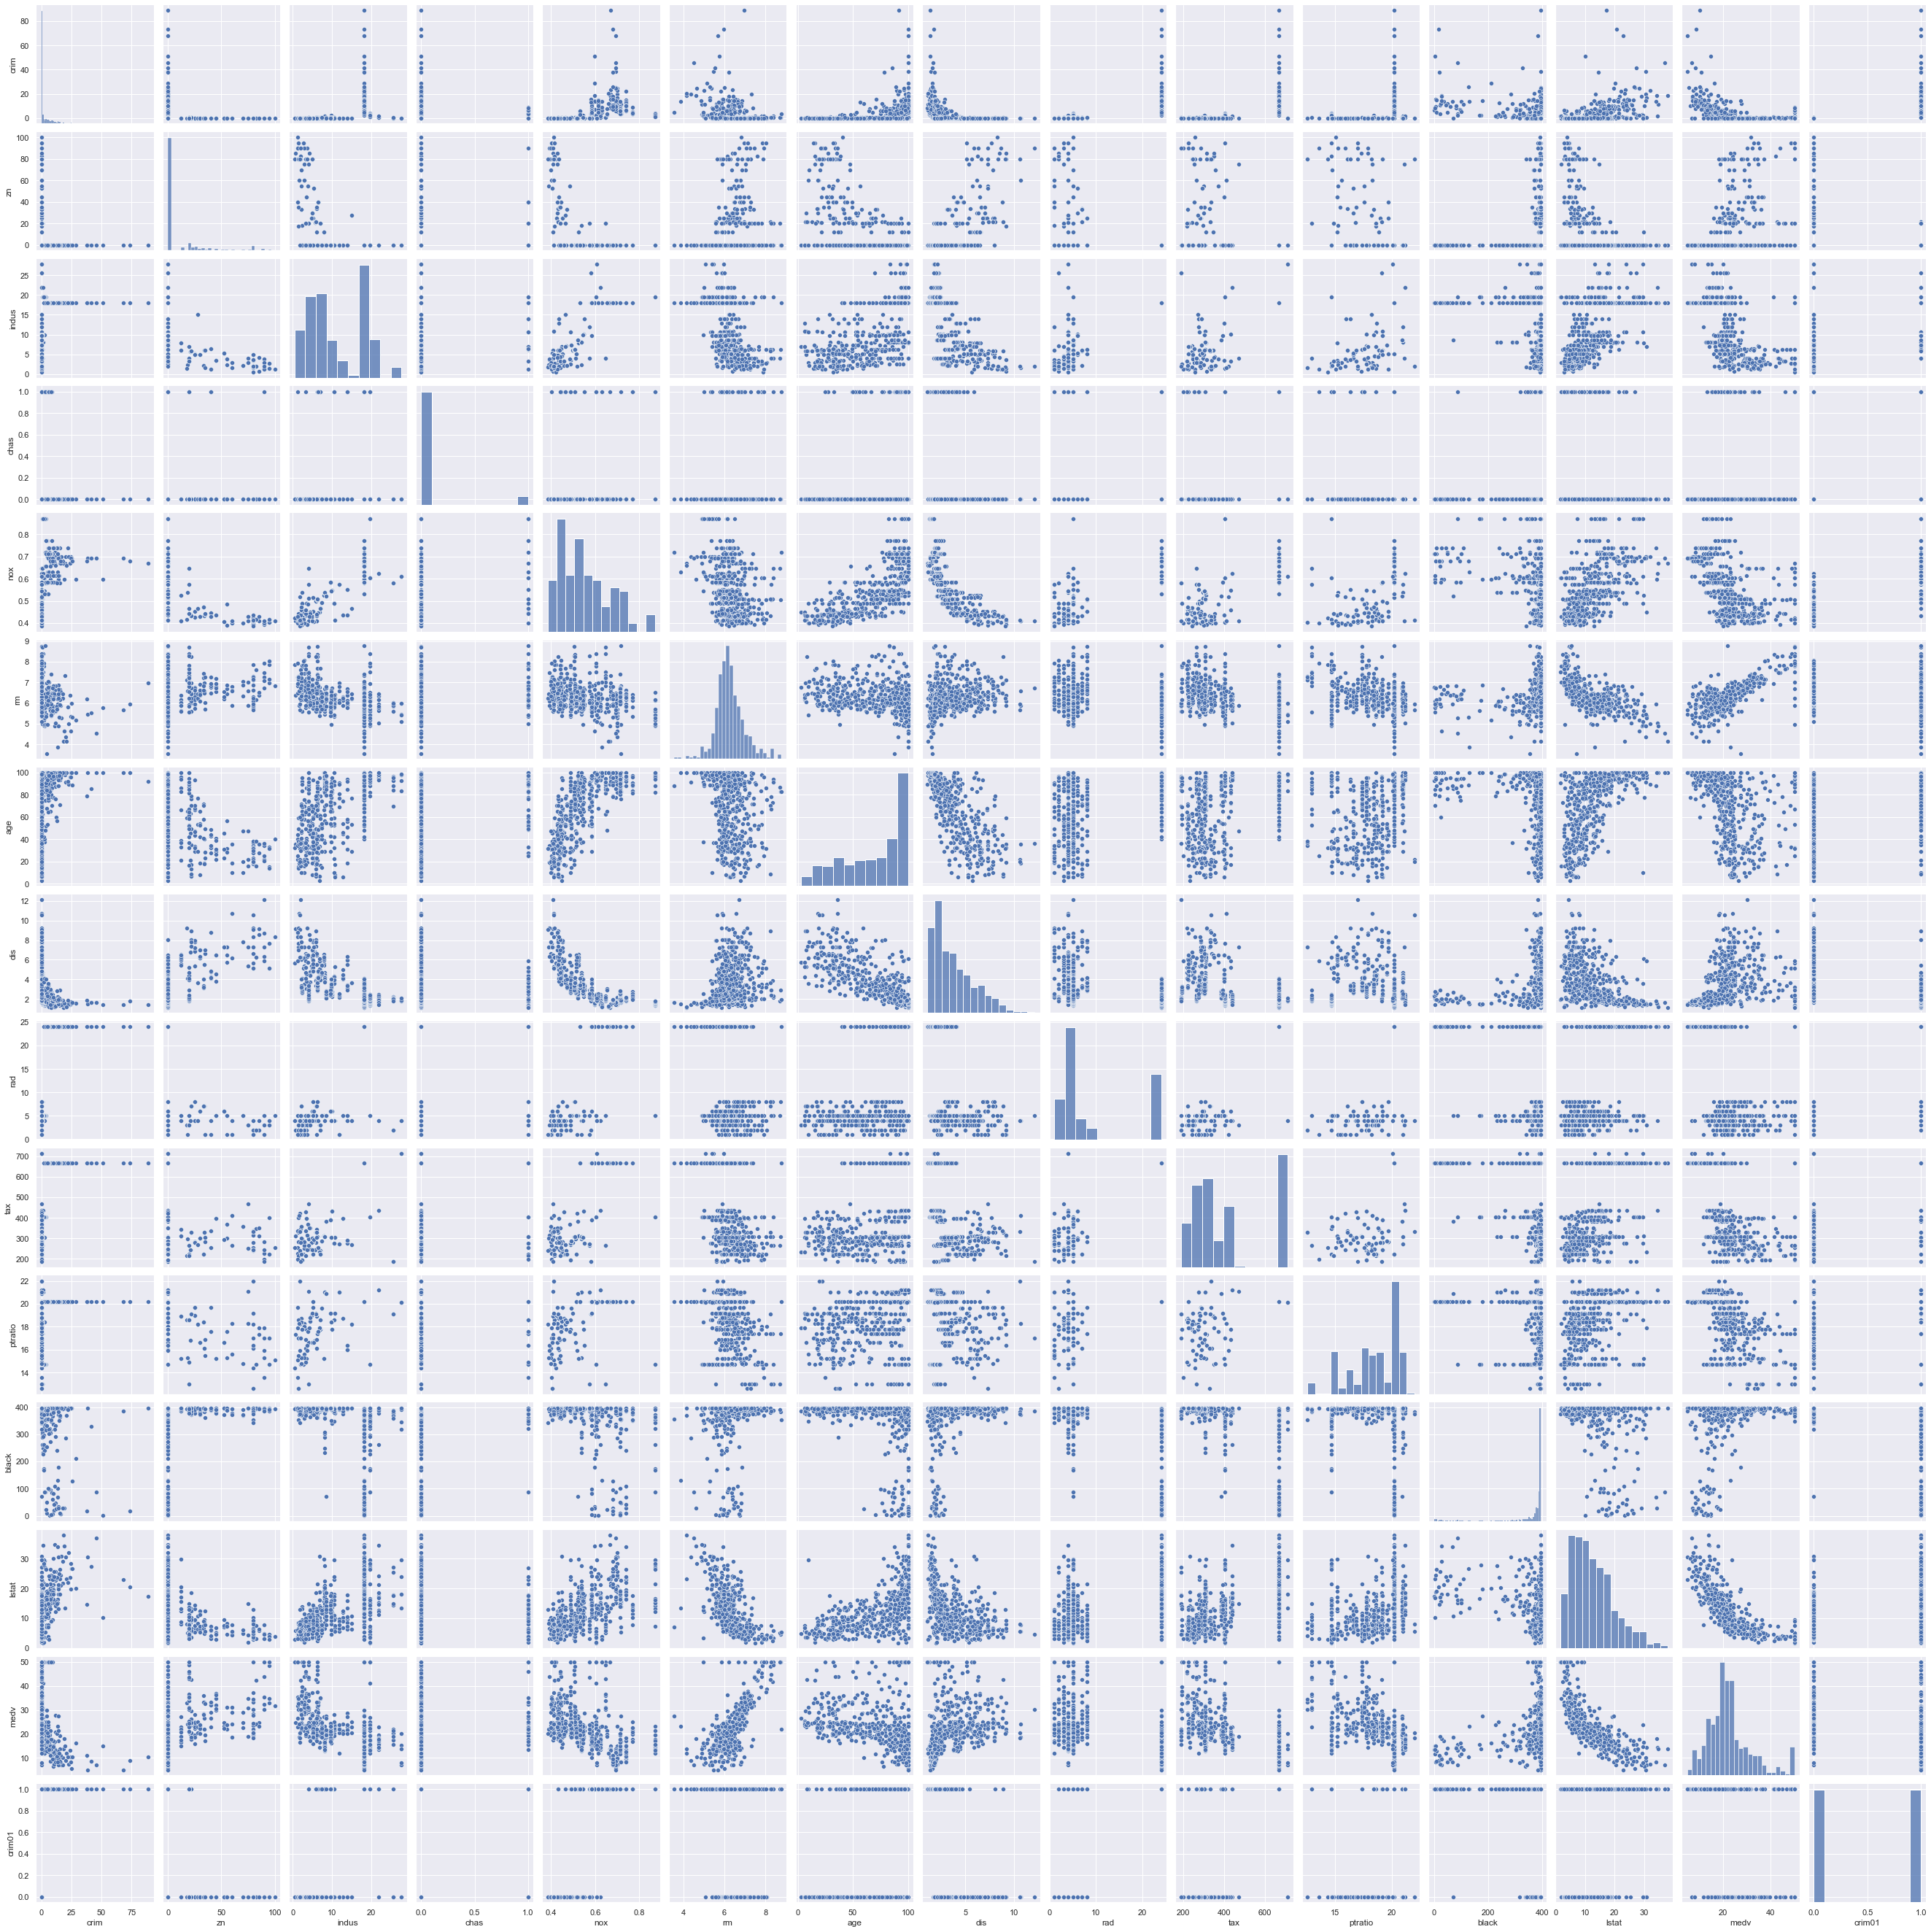

In [38]:
# exploring the dataset
sns.pairplot(boston_df);

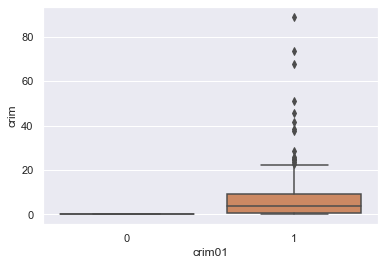

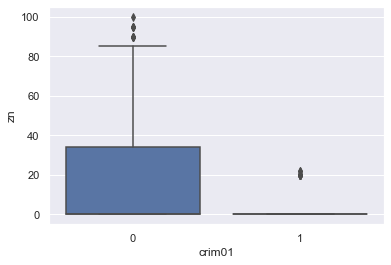

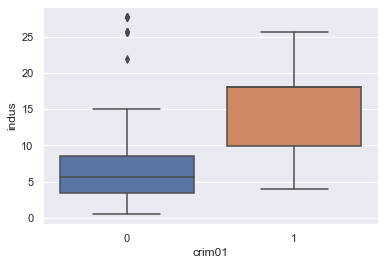

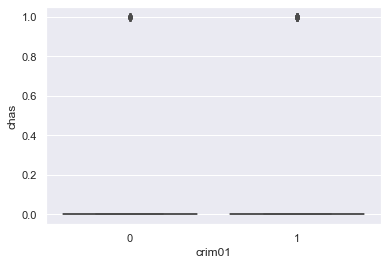

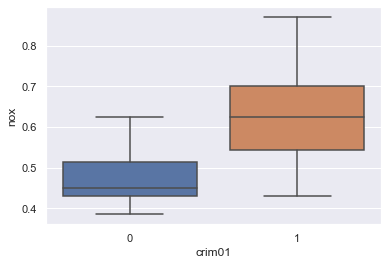

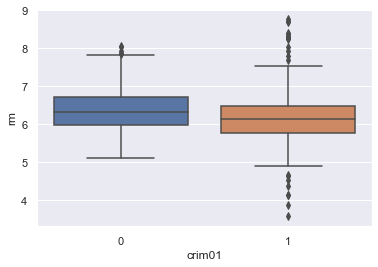

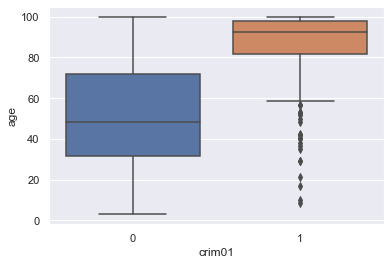

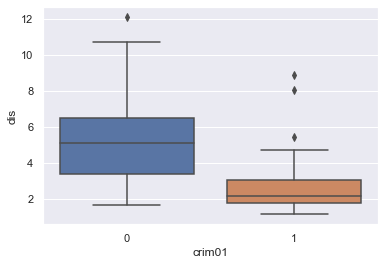

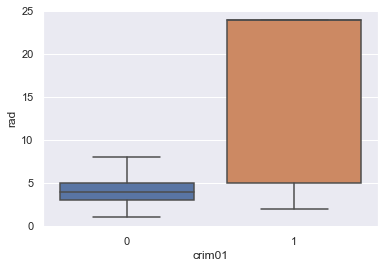

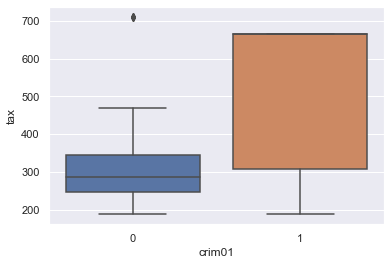

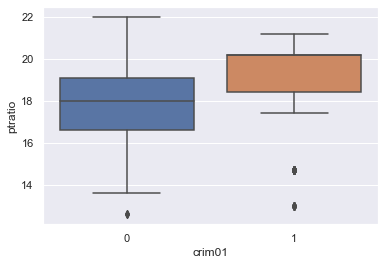

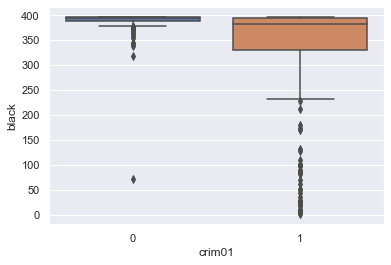

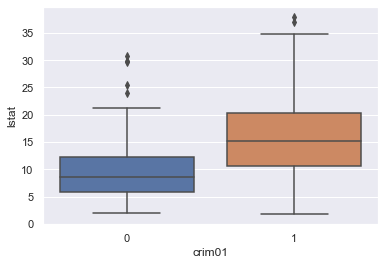

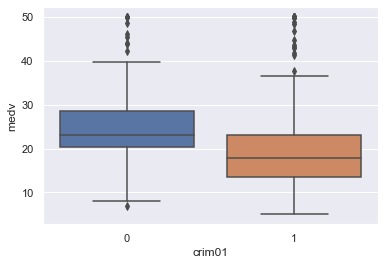

In [39]:
# more exploration

for col in boston_df.columns.drop(['crim01']):
    sns.boxplot(x=boston_df['crim01'], y=boston_df[col])
    plt.show();

In [40]:
# Split the boston dataset 0.7/0.3
predictors = boston_df.columns.drop(['crim', 'crim01'])

X_train, X_test, y_train, y_test = train_test_split(boston_df[predictors], 
                                                    boston_df['crim01'],
                                                    test_size=0.30,
                                                    random_state=42)

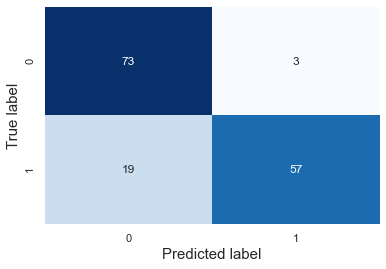

Accuracy                                 0.8553
Total_Error_Rate                         0.1447
True_Negative_Rate (Specificity)         0.9605
True_Positive_Rate (Recall)              0.7500
False_Negative_Rate                      0.2500
False_Positive_Rate                      0.0395
negative_Predictive_Value                0.7935
Positive_Predictive_Value (Precision)    0.9500
Prior_Error_Rate                         0.5000
dtype: float64

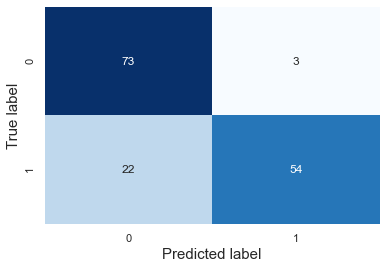

Accuracy                                 0.8355
Total_Error_Rate                         0.1645
True_Negative_Rate (Specificity)         0.9605
True_Positive_Rate (Recall)              0.7105
False_Negative_Rate                      0.2895
False_Positive_Rate                      0.0395
negative_Predictive_Value                0.7684
Positive_Predictive_Value (Precision)    0.9474
Prior_Error_Rate                         0.5000
dtype: float64

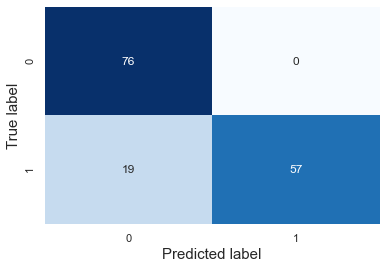

Accuracy                                 0.8355
Total_Error_Rate                         0.1645
True_Negative_Rate (Specificity)         0.9605
True_Positive_Rate (Recall)              0.7105
False_Negative_Rate                      0.2895
False_Positive_Rate                      0.0395
negative_Predictive_Value                0.7684
Positive_Predictive_Value (Precision)    0.9474
Prior_Error_Rate                         0.5000
dtype: float64

In [41]:
models = dict()
m_names = ["Logistic regression", "LDA"]

for i, model in enumerate([LogR(), LDA()]):
    # Model 
    model = model.fit(preprocessing.scale(X_train), y_train)

    # predict y_test
    y_pred = model.predict(preprocessing.scale(X_test))
    
    # confusion matrix
    c_m = confusion_matrix(y_test, y_pred)

    # confusion matrix
    plot_confusion_matrix(c_m)

    # overall stats
    model_stats = conf_mtx_stats(c_m)
    display(model_stats)

    models[m_names[i]] = c_m, model_stats
    
    
# Model QDA
qda = QDA().fit(X_train, y_train)

# predict y_test
y_pred = qda.predict(X_test)

# confusion matrix
c_m = confusion_matrix(y_test, y_pred)

# confusion matrix
plot_confusion_matrix(c_m)

# overall stats
qda_stats = conf_mtx_stats(c_m)
display(model_stats)

models['QDA'] = c_m, qda_stats

KNN with K = 1


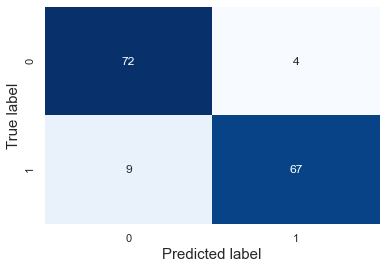

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 2


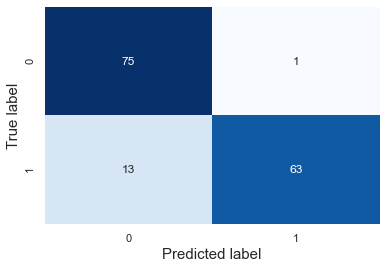

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 3


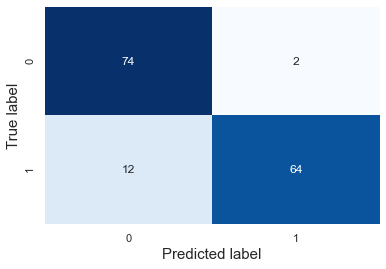

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 4


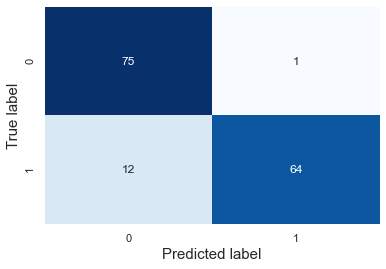

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 5


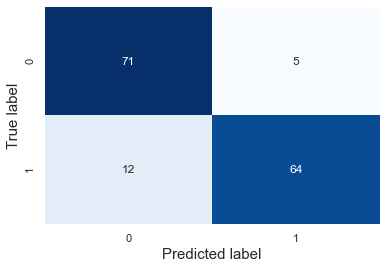

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 8


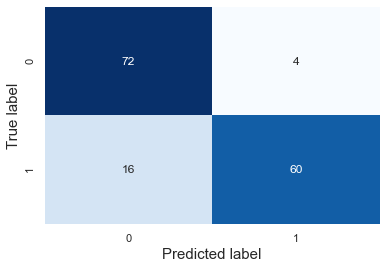

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 10


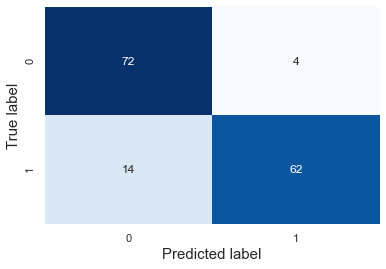

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 12


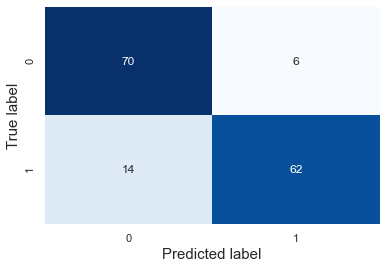

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 15


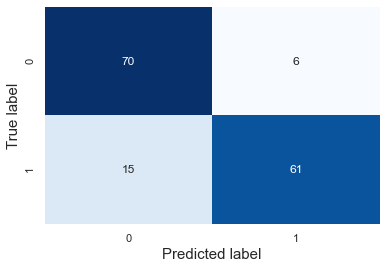

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 18


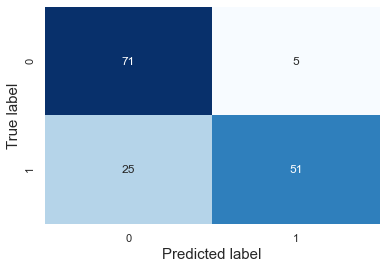

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 20


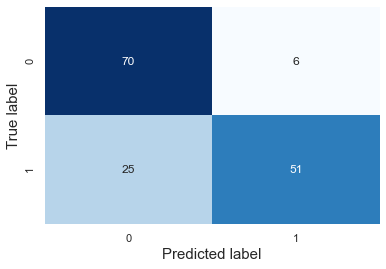

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 25


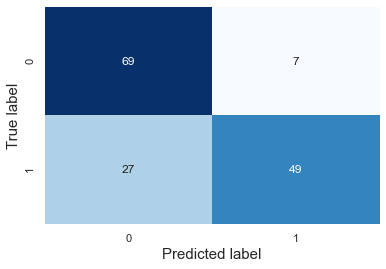

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 

KNN with K = 30


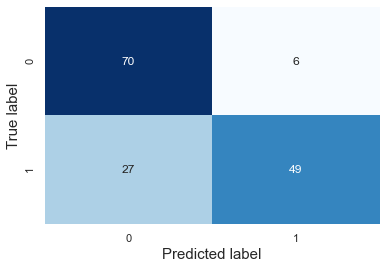

Accuracy                                 0.8729
Total_Error_Rate                         0.1271
True_Negative_Rate (Specificity)         0.7692
True_Positive_Rate (Recall)              1.0000
False_Negative_Rate                      0.0000
False_Positive_Rate                      0.2308
negative_Predictive_Value                1.0000
Positive_Predictive_Value (Precision)    0.7794
Prior_Error_Rate                         0.5508
dtype: float64

----------------------------------------- 



In [42]:
for i in [1,2,3,4,5,8,10,12,15,18,20,25,30]:
    print("KNN with K =", i)
    # Model 
    
    knn = KNN(i).fit(preprocessing.scale(np.array(X_train)), y_train)

    # predict y_test
    y_pred = knn.predict(preprocessing.scale(np.array(X_test)))
    
    # confusion matrix
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))

    # overall stats
    KNN_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
    display(lda_stats)
    
    models["KNN"+str(i)] = c_m, KNN_stats
    print("-----------------------------------------", '\n')

In [43]:
# showing the models' score with sorting.
acc = []
for i in models: 
    acc.append([i, models[i][1][0]])
acc = pd.DataFrame(acc, columns=['model', 'accuracy'])
acc.sort_values('accuracy', ascending=False)

,model,accuracy
3,KNN1,0.9145
6,KNN4,0.9145
4,KNN2,0.9079
5,KNN3,0.9079
7,KNN5,0.8882
9,KNN10,0.8816
2,QDA,0.8750
8,KNN8,0.8684
10,KNN12,0.8684
11,KNN15,0.8618


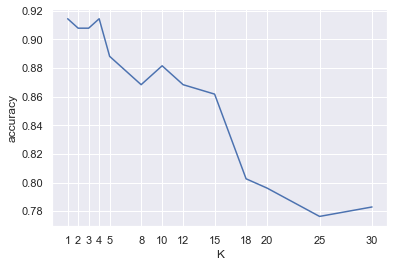

In [44]:
sns.lineplot(x= [1,2,3,4,5,8,10,12,15,18,20,25,30], y = 'accuracy', data=acc[acc.model.str.contains('KNN')])
plt.xticks([1,2,3,4,5,8,10,12,15,18,20,25,30])
plt.xlabel('K');

>- **Comment:**
>  - **Logistic regression** and **LDA** performing the worse among other models in predicting $boston$ dataset, with a score of $80.92\%$, $82.89\%$ respectively, and 
>  - we can improve the accuracy by `scaling` the training set and get a score of $85.53\%$, $83.55\%$ respectively.
>  - The **QDA** model performing better than **Logistic regression** and **LDA** under the dataset criteria.
>  - **KNN** models tend to beat all other models, from the graph above, the optimal $K$ value is $K = 1,4$ providing the highest score, after $K =4$ the KNN's score keeps falling down. 
>  - Surprisingly, scaling doesn't improve $\text{KNN}$ models score.

# Done!